## Experimental Values vs Actual Values in f(x,y)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns; 
from matplotlib import pyplot as plt

### Actual Data(without an error)

In [3]:
def my_func(x,y):
    return (i*j+i**2);

In [4]:
f = open("test3d.csv", "w+")

text = 'x,y,z\n'
for i in range(10):
    for j in range(10):
        text = text + str(i) + ',' + str(j) + ',' + str(my_func(i,j)) + '\n'

f.write(text)
f.close()

In [5]:
data = pd.read_csv('test3d.txt')

In [6]:
data.head()

,x,y,z
0,0,0,0
1,0,1,1
2,0,2,8
3,0,3,27
4,0,4,64


In [7]:
exps = []
for exp in range(5):
    sample_data = pd.read_csv('test3d.csv')
    exps.append(sample_data.z)

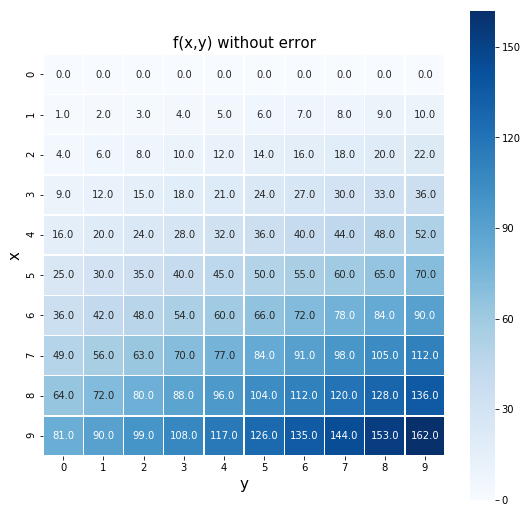

In [8]:
plt.figure(figsize=(9,9))
pivot_table = sample_data.pivot('x', 'y','z')
plt.xlabel('x', size = 15)
plt.ylabel('y', size = 15)
plt.title('f(x,y) without error', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues');

### Experiment Data

In [9]:
import random

In [10]:
def error():
    return (random.random()-0.5)*10

In [11]:
for exp in range(5):
    f = open("experiment3d"+str(exp)+".csv", "w+")

    text = 'x,y,z\n'

    for i in range(10):
        for j in range(10):
            text = text + str(i) + ',' + str(j) + ',' + str(my_func(i,j)+error()) + '\n'

    f.write(text)
    f.close()

In [12]:
sample_data = pd.read_csv('experiment3d0.csv')
sample_data.head(10)

,x,y,z
0,0,0,-2.518265
1,0,1,0.628516
2,0,2,-0.020798
3,0,3,0.261344
4,0,4,-0.846415
5,0,5,-3.596612
6,0,6,-4.842554
7,0,7,-0.021515
8,0,8,3.777941
9,0,9,1.018047


In [13]:
#exps = []
#for exp in range(5):
#    sample_data = pd.read_csv('experiment'+ str(exp) +'.txt')
#    exps.append(sample_data.z)

#exps

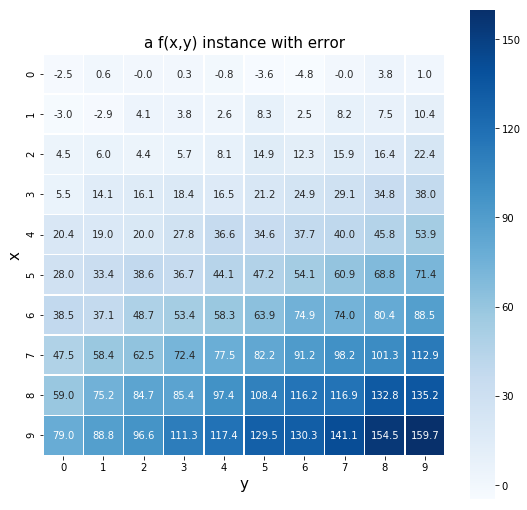

In [14]:
plt.figure(figsize=(9,9))
pivot_table = sample_data.pivot('x', 'y','z')
plt.xlabel('x', size = 15)
plt.ylabel('y', size = 15)
plt.title('a f(x,y) instance with error', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues');

In [15]:
import glob
path = '/Users/cakmadam98/Desktop/soslab' # use your path
all_files = glob.glob(path + "/experiment3d*.csv")

In [16]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [17]:
frame = frame.groupby(['x', 'y']).mean()
frame = frame.reset_index()
frame.head(10)

,x,y,z
0,0,0,0.576262
1,0,1,-0.406013
2,0,2,0.048627
3,0,3,-1.160855
4,0,4,0.086739
5,0,5,-0.792467
6,0,6,-0.702812
7,0,7,-0.205262
8,0,8,1.660727
9,0,9,0.368378


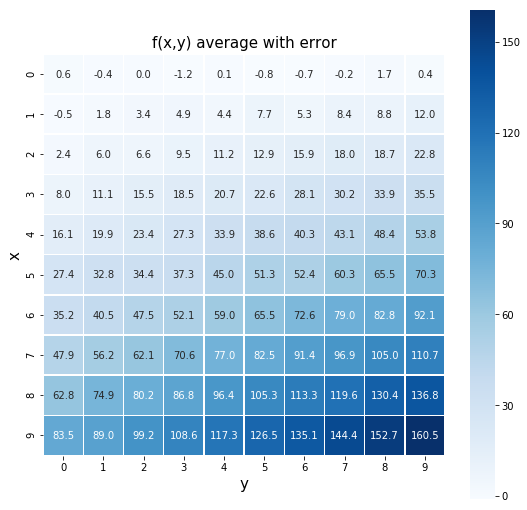

In [18]:
plt.figure(figsize=(9,9))
pivot_table = frame.pivot('x', 'y','z')
plt.xlabel('x', size = 15)
plt.ylabel('y', size = 15)
plt.title('f(x,y) average with error', size = 15)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues');